In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Data/PhiTrain.csv')

In [5]:
X = np.array(df.iloc[0:-1,1:])
y = np.array(df.iloc[-1,1:])[None,:].astype(float)
X = torch.tensor(X)
y = torch.tensor(y)

# Manual K-Fold Cross Validation

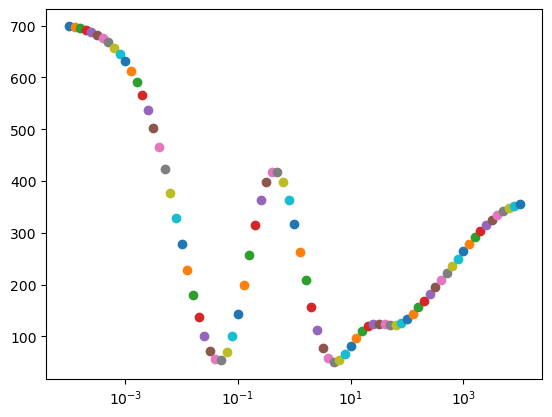

In [6]:
%matplotlib inline
splits = [(i*20,(i+1)*20) for i in range(10)]

rang = np.arange(-4,4.1,0.1)
for lam in rang:
    #print(lam)
    mse_total = torch.tensor(0.0, dtype =float)
    for s in splits:
        bool_array = np.ones(200)
        bool_array[s[0]:s[1]] = 0.0
        bool_array = (bool_array == 1.0)
        X_train = X[:,bool_array]
        X_val = X[:,~bool_array]
        y_train = y[:,bool_array]
        y_val = y[:,~bool_array]


        w = torch.linalg.inv(X_train@X_train.T + (10**lam)*torch.eye(55))@X_train@y_train.T

        y_pred_val =(w.T@X_val)
        mse = torch.nn.MSELoss()
        loss = mse(y_pred_val,y_val)
        mse_total += loss * 1/10
        #print(loss)
        #print(s)
        
    plt.scatter(10**lam,mse_total)
#plt.yscale('log')
plt.xscale('log')
plt.show()